<a href="https://colab.research.google.com/github/iandvecchia/adm01007/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUÇÃO**
O presente trabalho tem como objetivo a análise exploratória dos dados da pesquisa realizada pelo Sistema de Estimativas de Emissões e Remoções de Gases de Efeito Estufa (SEEG). O SEEG é uma iniciativa do observatório do clima que produz dados totalizadores anuais sobre a produção de gases do efeito estufa no Brasil.

#DICIONÁRIO
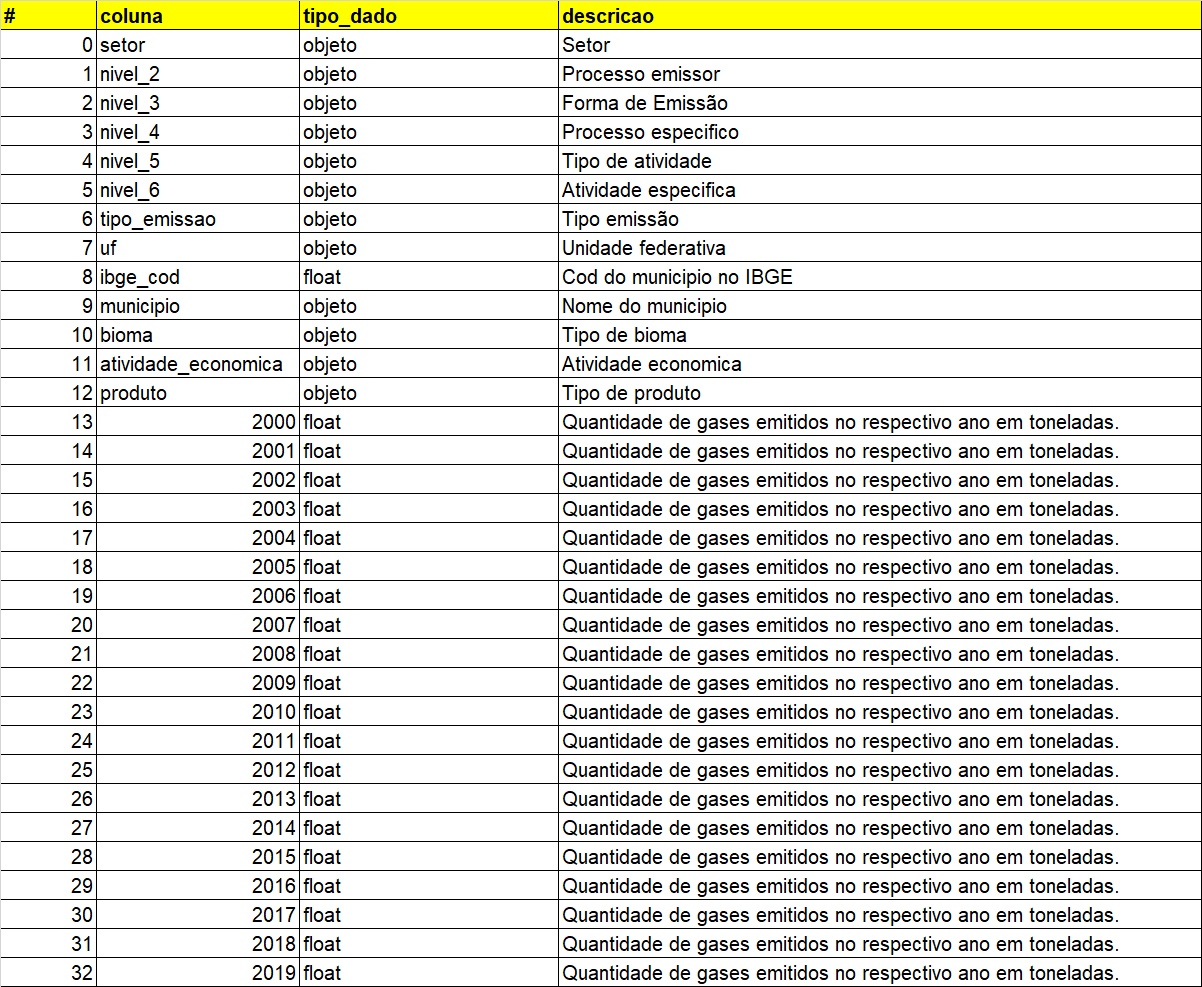


# ESCOLHA DA BASE DE DADOS
O SEEG disponibiliza em seu site uma base de dados com as informações de emissão e remoção de gases com relação aos municípios brasileiros de 2000 até 2019. 
Informações dos anos de 2020 e 2021 estão organizadas a partir dos estados brasileiros. Contemplando assim duas bases de dados: 
BASE DE DADOS DE MUNICÍPIOS (2000-2019)


#ANÁLISE DOS DADOS

##Importação das bibliotecas
Pandas e Matplotlib

In [ ]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importação da base de dados

In [102]:
df = pd.read_excel('/content/tabelao-setores-SEEG-Municipios-2_0-GWP-AR5-FINAL-SITE.xlsx', sheet_name='BD Completo SEEG Mun 2.0')

##Resumo das informações

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884913 entries, 0 to 884912
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   setor                884913 non-null  object 
 1   nivel_2              884913 non-null  object 
 2   nivel_3              868097 non-null  object 
 3   nivel_4              834510 non-null  object 
 4   nivel_5              822597 non-null  object 
 5   nivel_6              766530 non-null  object 
 6   tipo_emissao         884913 non-null  object 
 7   uf                   884461 non-null  object 
 8   ibge_cod             884912 non-null  float64
 9   municipio            881207 non-null  object 
 10  bioma                881206 non-null  object 
 11  atividade_economica  884913 non-null  object 
 12  produto              884913 non-null  object 
 13  2000                 884913 non-null  float64
 14  2001                 884913 non-null  float64
 15  2002             

##Apresentação da tabela

In [ ]:
df.head()

,setor,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,uf,ibge_cod,municipio,bioma,atividade_economica,produto,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Agropecuária,Cultivo de arroz,Diretas,Outros,Vegetal,Arroz,Emissão,AC,1200013.000,Acrelândia,Amazônia,Agricultura,Outros Alimentos e Bebidas,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,Agropecuária,Cultivo de arroz,Diretas,Outros,Vegetal,Arroz,Emissão,AC,1200054.000,Assis Brasil,Amazônia,Agricultura,Outros Alimentos e Bebidas,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Agropecuária,Cultivo de arroz,Diretas,Outros,Vegetal,Arroz,Emissão,AC,1200104.000,Brasiléia,Amazônia,Agricultura,Outros Alimentos e Bebidas,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Agropecuária,Cultivo de arroz,Diretas,Outros,Vegetal,Arroz,Emissão,AC,1200138.000,Bujari,Amazônia,Agricultura,Outros Alimentos e Bebidas,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Agropecuária,Cultivo de arroz,Diretas,Outros,Vegetal,Arroz,Emissão,AC,1200179.000,Capixaba,Amazônia,Agricultura,Outros Alimentos e Bebidas,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


##Apresentação de valores de referência para os dados numéricos da tabela
- Média 
- Desvio padrão
- Mínimo/máximo

In [ ]:
df.describe()

,ibge_cod,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,884912.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000,884913.000
mean,3276257.823,2412.167,2346.982,2671.984,3062.234,3036.251,2623.256,2126.357,1775.038,1751.489,1381.860,1379.667,1392.201,1456.976,1625.249,1624.186,1691.768,1721.641,1506.474,1502.041,1550.371
std,1004764.221,92486.972,98557.582,135044.867,167906.854,163175.626,131581.518,113463.350,92750.146,87586.634,72824.233,71602.341,73123.018,70783.140,74036.114,77148.224,79621.879,86093.415,80607.876,83891.697,89284.937
min,1.000,-15550567.000,-15550567.000,-15550803.000,-15550803.000,-15550803.000,-15550803.000,-17876532.000,-20445220.000,-21379519.000,-24527981.000,-24517959.000,-24502012.000,-24583902.000,-24575357.000,-24566085.000,-24550420.000,-24524521.000,-24503319.000,-24459920.000,-24408925.000
25%,2600609.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3153103.000,4.475,4.371,4.603,4.913,5.165,5.260,5.380,6.250,6.586,6.346,6.457,6.643,6.129,6.238,6.283,6.000,5.745,5.637,5.740,5.411
75%,4121505.000,82.423,81.016,83.812,92.000,95.440,96.418,97.624,108.120,111.602,109.214,114.061,115.000,113.499,118.741,117.937,114.459,110.748,107.927,109.000,104.313
max,5300108.000,29732696.000,39462101.000,64435886.000,82826804.000,68831351.000,52312856.000,52996230.000,33726640.000,28089413.000,17541689.000,13192539.000,15028499.000,12676516.241,13578710.591,16915760.000,15383099.291,18448998.000,17187487.991,18089682.341,20168194.000


In [ ]:
df[[2015, 2016, 2017, 2018, 2019]].describe()

,2015,2016,2017,2018,2019
count,884913.000,884913.000,884913.000,884913.000,884913.000
mean,1691.768,1721.641,1506.474,1502.041,1550.371
std,79621.879,86093.415,80607.876,83891.697,89284.937
min,-24550420.000,-24524521.000,-24503319.000,-24459920.000,-24408925.000
25%,0.000,0.000,0.000,0.000,0.000
50%,6.000,5.745,5.637,5.740,5.411
75%,114.459,110.748,107.927,109.000,104.313
max,15383099.291,18448998.000,17187487.991,18089682.341,20168194.000


#Valores de Referência dos últimos 5 anos:
Utilizados para comparação em calculos com relação as colunas do dataframe: 

In [ ]:
total_2015 = df[2015].sum() / 100000000
total_2016 = df[2016].sum() / 100000000
total_2017 = df[2017].sum() / 100000000
total_2018 = df[2018].sum() / 100000000
total_2019 = df[2019].sum() / 100000000

print(total_2015)
print(total_2016)
print(total_2017)
print(total_2018)
print(total_2019)

total_5_anos = total_2015+total_2016+total_2017+total_2018+total_2019

print(total_5_anos)

14.970672663126576
15.235028962593663
13.330983327328749
13.291757703745857
13.7194313800965
70.54787403689134


##Apresentação dos dados nas colunas
- Setor;
- Nivel_2: processo emissor;
- Nível_5: tipo de atividade;
- Bioma;
- Municipio;
- UF;
- Atividade econômica;
- Produto.


In [ ]:
df.groupby('setor')['setor'].count()

setor
Agropecuária                           586636
Energia                                 92366
Mudança de Uso da Terra e Florestas    133326
Processos Industriais                     174
Resíduos                                72411
Name: setor, dtype: int64

In [ ]:
df.groupby('nivel_2')['nivel_2'].count()

nivel_2
Alterações de Uso do Solo                                 85936
Cultivo de arroz                                           6514
Efluentes Liquidos                                        38991
Emissões Fugitivas                                           34
Emissões de HFCs                                              1
Emissões pela Queima de Combustíveis                      92332
Fermentação Entérica                                      58678
Indústria Química                                            20
Manejo de Dejetos Animais                                 91278
Produtos Minerais                                            93
Produção de Metais                                           58
Queima de Resíduos Agrícolas                              13028
Remoção em Áreas Protegidas                                3848
Remoção por Mudança de Uso da Terra                       16006
Remoção por Vegetação Secundária                          21047
Resíduos Florestais             

In [ ]:
df.groupby('nivel_5')['nivel_5'].count()

nivel_5
Alcatrão                                   5
Animal                                365110
Bagaço de cana                            11
Biogás                                     7
Carvão Mineral                             3
Carvão vapor 3100                         17
Carvão vapor 3300                         19
Carvão vapor 3700                          7
Carvão vapor 4200                         21
Carvão vapor 4500                         27
Carvão vapor 4700                         13
Carvão vapor 5200                         19
Carvão vapor 5900                          4
Carvão vapor 6000                         24
Carvão vapor sem especificação            10
Carvão vegetal                            17
Compostagem                             5570
Consumo de Combustíveis Fósseis           16
Consumo de Combustíveis Renováveis        13
Coque de carvão mineral                    9
Coque de petróleo                        161
Desmatamento                           49222
Di

In [97]:
df.groupby('bioma')['bioma'].count()

bioma
Amazônia           77409
Caatinga          160862
Cerrado           196442
Mata Atlântica    414328
Pampa              29462
Pantanal            2703
Name: bioma, dtype: int64

In [ ]:
df.groupby('uf')['uf'].count()

uf
AC      3141
AL     14897
AM      9049
AP      2475
BA     67072
CE     25911
DF       300
ES     11430
GO     37785
MA     33208
MG    136800
MS     16291
MT     28980
Nã         1
PA     21495
PB     31114
PE     28565
PI     35668
PR     56858
RJ     13604
RN     24224
RO      7518
RR      2257
RS     82799
SC     41095
SE     12456
SP    117640
TO     21828
Name: uf, dtype: int64

In [ ]:
df.groupby('municipio')['municipio'].count()

municipio
Abadia de Goiás        149
Abadia dos Dourados    149
Abadiânia              149
Abaetetuba             143
Abaeté                 151
                      ... 
Áurea                  128
Ângulo                 129
Érico Cardoso          152
Óbidos                 151
Óleo                   229
Name: municipio, Length: 5299, dtype: int64

In [ ]:
df.groupby('atividade_economica')['atividade_economica'].count()

atividade_economica
Agricultura                 221526
Agropecuária                150258
Cimento                       1771
Comercial                     6979
Energia Elétrica              2299
Metalurgia                    1088
Não alocado                  20658
Outras Industrias            36115
Pecuária                    365110
Produção de Combustíveis       144
Público                       3836
Residencial                   5137
Saneamento Básico            38990
Transporte                   31001
Uso de HFCs                      1
Name: atividade_economica, dtype: int64

In [ ]:
df.groupby('produto')['produto'].count()

produto
Aluminio e Outros Não Ferrosos da Metalurgia       473
Carnes                                          140590
Energia Elétrica                                  2298
Ferro e Aço                                        597
Leite                                            45640
Não alocado                                     529521
Outros Alimentos e Bebidas                      165794
Name: produto, dtype: int64

##Identificação e gráfico das quantidades por categorias específicas:

In [ ]:
quantidade_por_setor = pd.DataFrame(
    df.groupby(
        by='setor'
    )[[2015,2016,2017,2018,2019]].sum() / 100000000
)
quantidade_por_setor['total'] = quantidade_por_setor[2015] + quantidade_por_setor[2016] + quantidade_por_setor[2017] + quantidade_por_setor[2018] + quantidade_por_setor[2019]

quantidade_por_setor['media'] = quantidade_por_setor['total'] / 5

quantidade_por_setor['%_total_5_anos'] = quantidade_por_setor['total'] / total_5_anos * 100

print(quantidade_por_setor.sort_values(by='total', ascending=False))



                                     2015  2016  2017  2018  2019  total  \
setor                                                                      
Agropecuária                        5.515 5.628 5.618 5.601 5.630 27.991   
Energia                             4.758 4.401 4.473 4.255 4.306 22.194   
Mudança de Uso da Terra e Florestas 2.860 3.413 1.387 1.547 1.895 11.102   
Processos Industriais               1.021 0.958 0.999 1.010 0.995  4.983   
Resíduos                            0.817 0.834 0.853 0.879 0.894  4.278   

                                     media  %_total_5_anos  
setor                                                       
Agropecuária                         5.598          39.676  
Energia                              4.439          31.459  
Mudança de Uso da Terra e Florestas  2.220          15.737  
Processos Industriais                0.997           7.063  
Resíduos                             0.856           6.064  


AxesSubplot(0.125,0.125;0.775x0.755)


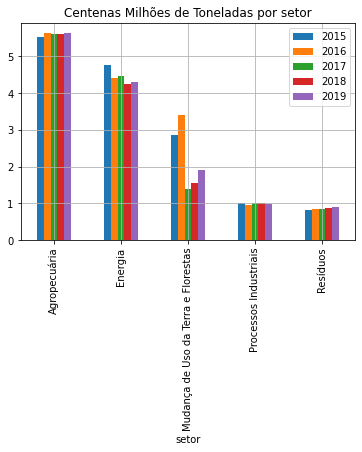

In [ ]:
ax = quantidade_por_setor[[2015,2016,2017,2018,2019]].plot(
    kind= 'bar',
    grid=True,
    title='Centenas Milhões de Toneladas por setor'
)


print(ax)

In [95]:
quantidade_por_bioma = pd.DataFrame(
    df.groupby(
        by='bioma'
    )[[2015,2016,2017,2018,2019]].sum() / 100000000
)
quantidade_por_bioma['total'] = quantidade_por_bioma[2015] + quantidade_por_bioma[2016] + quantidade_por_bioma[2017] + quantidade_por_bioma[2018] + quantidade_por_bioma[2019]

quantidade_por_bioma['media'] = quantidade_por_bioma['total'] / 5

quantidade_por_bioma['%_total_5_anos'] = quantidade_por_bioma['total'] / total_5_anos * 100

print(quantidade_por_bioma.sort_values(by='total', ascending=False))

                2015  2016  2017  2018  2019  total  media  %_total_5_anos
bioma                                                                     
Mata Atlântica 4.792 4.516 4.490 4.510 4.429 22.737  4.547          32.230
Amazônia       3.329 4.386 2.486 2.937 3.736 16.874  3.375          23.919
Cerrado        3.676 3.425 3.453 2.895 2.806 16.253  3.251          23.039
Caatinga       0.692 0.584 0.548 0.574 0.436  2.834  0.567           4.017
Pampa          0.597 0.553 0.541 0.532 0.508  2.731  0.546           3.872
Pantanal       0.123 0.134 0.133 0.122 0.084  0.595  0.119           0.843


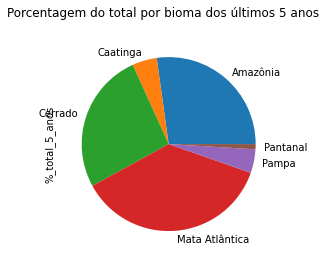

In [101]:
ax = quantidade_por_bioma[['%_total_5_anos']].plot(
    kind= 'pie',
    grid=True,
    title='Porcentagem da quantidade total por bioma dos últimos 5 anos',
    subplots=True,
    legend=False
)


print(ax)

In [ ]:
quantidade_por_atividade = pd.DataFrame(
    df.groupby(
        by='atividade_economica'
    )[[2015, 2016, 2017,2018,2019]].sum() / 100000000
)


quantidade_por_atividade['total'] = quantidade_por_atividade[2015] + quantidade_por_atividade[2016] + quantidade_por_atividade[2017] + quantidade_por_atividade[2018] + quantidade_por_atividade[2019]

quantidade_por_atividade['media'] = quantidade_por_atividade['total'] / 5

quantidade_por_atividade['%_total_5_anos'] = quantidade_por_atividade['total'] / total_5_anos * 100

print(quantidade_por_atividade.sort_values(by='total', ascending=False))


                           2015   2016   2017   2018   2019   total  media  \
atividade_economica                                                          
Agropecuária              6.845  7.439  5.473  5.626  5.983  31.367  6.273   
Pecuária                  4.608  4.667  4.586  4.562  4.585  23.007  4.601   
Transporte                2.246  2.202  2.218  2.114  2.146  10.926  2.185   
Agricultura               0.907  0.961  1.031  1.039  1.045   4.983  0.997   
Saneamento Básico         0.767  0.783  0.802  0.826  0.841   4.018  0.804   
Metalurgia                0.603  0.559  0.607  0.590  0.554   2.912  0.582   
Energia Elétrica          0.772  0.543  0.579  0.491  0.511   2.896  0.579   
Produção de Combustíveis  0.559  0.539  0.539  0.540  0.552   2.731  0.546   
Outras Industrias         0.514  0.480  0.483  0.471  0.465   2.412  0.482   
Cimento                   0.381  0.332  0.310  0.308  0.321   1.652  0.330   
Residencial               0.258  0.257  0.263  0.271  0.268   1.

AxesSubplot(0.125,0.125;0.775x0.755)


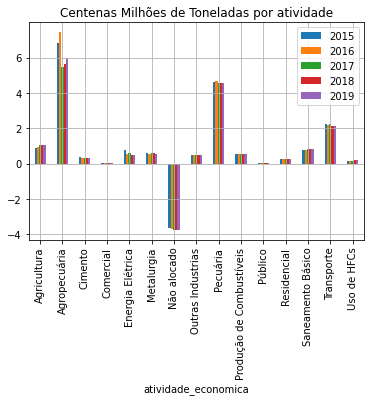

In [ ]:
ax = quantidade_por_atividade[[2015,2016,2017,2018,2019]].plot(
    kind= 'bar',
    grid=True,
    title='Centenas Milhões de Toneladas por atividade'
)


print(ax)

In [ ]:
quantidade_por_produto = pd.DataFrame(
    df.groupby(
        by='produto'
    )[[2015,2016,2017,2018,2019]].sum() / 100000000
)


quantidade_por_produto['total'] = quantidade_por_produto[2015] + quantidade_por_produto[2016] + quantidade_por_produto[2017] + quantidade_por_produto[2018] + quantidade_por_produto[2019]

quantidade_por_produto['media'] = quantidade_por_produto['total'] / 5

quantidade_por_produto['%_total_5_anos'] = quantidade_por_produto['total'] / total_5_anos * 100

print(quantidade_por_produto.sort_values(by='total', ascending=False))


                                              2015  2016  2017  2018  2019  \
produto                                                                      
Não alocado                                  8.582 9.087 7.131 7.237 7.663   
Carnes                                       3.793 3.898 3.908 3.897 3.918   
Leite                                        0.698 0.652 0.562 0.545 0.543   
Outros Alimentos e Bebidas                   0.583 0.557 0.607 0.590 0.590   
Energia Elétrica                             0.770 0.541 0.577 0.489 0.508   
Ferro e Aço                                  0.479 0.434 0.482 0.493 0.453   
Aluminio e Outros Não Ferrosos da Metalurgia 0.065 0.066 0.065 0.040 0.043   

                                              total  media  %_total_5_anos  
produto                                                                     
Não alocado                                  39.699  7.940          56.273  
Carnes                                       19.414  3.883        

AxesSubplot(0.125,0.125;0.775x0.755)


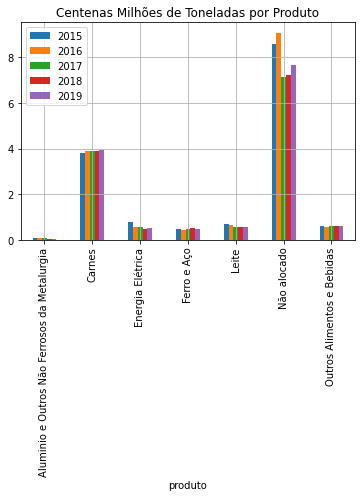

In [ ]:
ax = quantidade_por_produto[[2015,2016,2017,2018,2019]].plot(
    kind= 'bar',
    grid=True,
    title='Centenas Milhões de Toneladas por Produto'
)

print(ax)

##Ordenamento dos 20 municípios que mais emitiram gases do efeito estufa nos últimos 5 anos; 

In [ ]:
quantidade_por_municipio = pd.DataFrame(
    df.groupby(['municipio', 'uf']
    )[[2015,2016,2017,2018,2019]].sum() / 100000000
)


quantidade_por_municipio['total'] = quantidade_por_municipio[2015] + quantidade_por_municipio[2016] + quantidade_por_municipio[2017] + quantidade_por_municipio[2018] + quantidade_por_municipio[2019]

quantidade_por_municipio['media'] = quantidade_por_municipio['total'] / 5

quantidade_por_municipio['%_total_5_anos'] = quantidade_por_municipio['total'] / total_5_anos * 100

print(quantidade_por_municipio.sort_values(by='total', ascending=False).head(20))

                                     2015  2016  2017  2018  2019  total  \
municipio                        uf                                        
Porto Velho                      RO 0.194 0.263 0.247 0.225 0.202  1.131   
São Paulo                        SP 0.185 0.168 0.180 0.170 0.165  0.868   
São Félix do Xingu               PA 0.111 0.154 0.126 0.157 0.176  0.724   
Rio de Janeiro                   RJ 0.151 0.146 0.144 0.140 0.138  0.718   
Pacajá                           PA 0.104 0.100 0.119 0.124 0.154  0.601   
Nova Mamoré                      RO 0.110 0.115 0.130 0.106 0.070  0.532   
Colniza                          MT 0.120 0.094 0.100 0.103 0.112  0.528   
Serra                            ES 0.097 0.103 0.108 0.111 0.102  0.521   
Novo Repartimento                PA 0.090 0.093 0.080 0.104 0.105  0.472   
Lábrea                           AM 0.054 0.122 0.051 0.063 0.140  0.430   
Portel                           PA 0.070 0.093 0.084 0.087 0.090  0.423   
Novo Progres

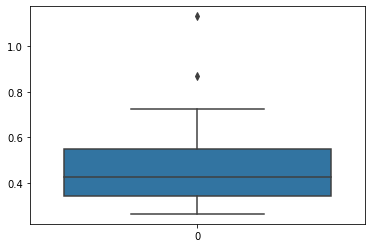

In [ ]:
sns.boxplot(data=quantidade_por_municipio['total'].sort_values(ascending=False).head(20))

In [ ]:
quantidade_por_estado = pd.DataFrame(
    df.groupby(['uf']
    )[[2015,2016,2017,2018,2019]].sum() / 100000000
)


quantidade_por_estado['total'] = quantidade_por_estado[2015] + quantidade_por_estado[2016] + quantidade_por_estado[2017] + quantidade_por_estado[2018] + quantidade_por_estado[2019]

quantidade_por_estado['media'] = quantidade_por_estado['total'] / 5

quantidade_por_estado['%_total_5_anos'] = quantidade_por_estado['total'] / total_5_anos * 100

print(quantidade_por_estado.sort_values(by='total', ascending=False).head(20))

    2015  2016  2017  2018  2019  total  media  %_total_5_anos
uf                                                            
MT 1.879 1.587 1.667 1.736 1.936  8.806  1.761          12.482
SP 1.518 1.430 1.462 1.426 1.399  7.236  1.447          10.257
PA 1.269 1.942 0.972 1.320 1.401  6.904  1.381           9.786
MG 1.490 1.371 1.318 1.319 1.266  6.764  1.353           9.587
RO 0.891 1.043 0.983 0.931 0.860  4.707  0.941           6.673
RS 0.882 0.855 0.827 0.815 0.801  4.180  0.836           5.925
GO 0.785 0.753 0.765 0.714 0.717  3.735  0.747           5.294
RJ 0.777 0.698 0.727 0.702 0.718  3.622  0.724           5.134
PR 0.735 0.706 0.681 0.703 0.697  3.521  0.704           4.991
MS 0.668 0.689 0.661 0.604 0.540  3.163  0.633           4.483
BA 0.641 0.577 0.540 0.535 0.489  2.781  0.556           3.942
MA 0.688 0.717 0.560 0.411 0.401  2.777  0.555           3.937
SC 0.462 0.456 0.446 0.488 0.460  2.312  0.462           3.278
TO 0.435 0.351 0.351 0.251 0.218  1.607  0.321         

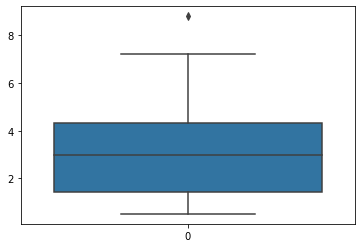

In [ ]:
sns.boxplot(data=quantidade_por_estado['total'].sort_values(ascending=False).head(20))